In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("RealEstates (1).csv")

In [3]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort
0,0,79545.458574,missing,?,NaN,23086.800503,$1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937
1,1,79248.642455,6.0028998082752425,6.730821019094919,3.09,40173.072174,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN
2,2,61287.067179,5.865889840310001,8.512727430375099,5.13,36882.159400,$1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN
3,3,63345.240046,7.1882360945186425,?,NaN,34310.242831,Rs16808.224088392624,USS Barnett\nFPO AP 44820,NaN
4,4,59982.197226,5.040554523106283,7.839387785120487,4.23,26354.109472,$630943.4893385402,USNS Raymond\nFPO AE 09386,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   object 
 3   Avg. Area Number of Rooms     5000 non-null   object 
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   object 
 7   Address                       5000 non-null   object 
 8   Avg Area Comfort              200 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 351.7+ KB


1.From above information we can say that data consist of 5000 rows are and 9 columns. 2.Datatypes of the columns are float=4,int=1 and object=4 3.Avg. Area Number of Bedrooms,Avg Area Comfort column has some null values i.e 1667 and 4800 respectively.

In [5]:
df.describe()

,ids,Avg. Area Income,Avg. Area Number of Bedrooms,Area Population,Avg Area Comfort
count,5000.000000,5000.000000,3333.000000,5000.000000,200.000000
mean,2499.500000,68583.108984,3.998083,36163.516039,0.512601
std,1443.520003,10657.991214,1.239102,9925.650114,0.282111
min,0.000000,17796.631190,2.000000,172.610686,0.007437
25%,1249.750000,61480.562388,3.150000,29403.928702,0.260780
50%,2499.500000,68804.286404,4.050000,36199.406689,0.515369
75%,3749.250000,75783.338666,4.500000,42861.290769,0.766171
max,4999.000000,107701.748378,6.500000,69621.713378,0.991570


1.Convert the price which in Rs to Dollar where  1=75.

2. Remove $ symbols & Rs from Price columns

In [6]:
df['Price'].head()

0     $1059033.5578701235
1    Rs20078.545531292668
2     $1058987.9878760849
3    Rs16808.224088392624
4      $630943.4893385402
Name: Price, dtype: object

In [5]:
def conversion(num):
    if "Rs" in num:
        num=num.replace("Rs",'')
        return float(num)/81
    else:
        num=num.replace("$",'')
        return float(num)

In [6]:
df['Price']=df['Price'].apply(conversion)

In [7]:
df['Price']

0       1.059034e+06
1       2.478833e+02
2       1.058988e+06
3       2.075089e+02
4       6.309435e+05
            ...     
4995    1.745175e+02
4996    1.482618e+06
4997    1.696674e+02
4998    1.198657e+06
4999    2.138190e+02
Name: Price, Length: 5000, dtype: float64

3.Use address column and create the state column out of it

In [10]:
df["Address"].value_counts()

208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025      1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
481 Kaitlin Mission Apt. 309\nJodystad, IA 16947                 1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: Address, Length: 5000, dtype: int64

In [11]:
def state(add):
    s=add.split()
    return s[-2]

In [12]:
df['state']=df['Address'].apply(state)

In [13]:
df['state']

0       NE
1       CA
2       WI
3       AP
4       AE
        ..
4995    AP
4996    AA
4997    VA
4998    AE
4999    NV
Name: state, Length: 5000, dtype: object

In [14]:
df

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,state
0,0,79545.458574,missing,?,NaN,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937,NE
1,1,79248.642455,6.0028998082752425,6.730821019094919,3.09,40173.072174,2.677139e+02,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN,CA
2,2,61287.067179,5.865889840310001,8.512727430375099,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN,WI
3,3,63345.240046,7.1882360945186425,?,NaN,34310.242831,2.241097e+02,USS Barnett\nFPO AP 44820,NaN,AP
4,4,59982.197226,5.040554523106283,7.839387785120487,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,NaN,AE
...,...,...,...,...,...,...,...,...,...,...
4995,4995,60567.944140,7.830362443635721,?,NaN,22837.361035,1.884789e+02,USNS Williams\nFPO AP 30153-7653,NaN,AP
4996,4996,78491.275435,6.999134987291412,6.576762660738709,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352",NaN,AA
4997,4997,63390.686886,7.250590614779546,4.805080980291155,2.13,33266.145490,1.832408e+02,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",NaN,VA
4998,4998,68001.331235,5.534388416220344,?,NaN,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316,NaN,AE


# Preprocessing and Data Cleaning

In [15]:
df.isnull().sum()

ids                                0
Avg. Area Income                   0
Avg. Area House Age                0
Avg. Area Number of Rooms          0
Avg. Area Number of Bedrooms    1667
Area Population                    0
Price                              0
Address                            0
Avg Area Comfort                4800
state                              0
dtype: int64

In [16]:
df.drop(["ids","Avg Area Comfort"],axis=1, inplace=True)

In [17]:
df["Avg. Area Number of Bedrooms"].fillna(df["Avg. Area Number of Bedrooms"].mean(),inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   object 
 2   Avg. Area Number of Rooms     5000 non-null   object 
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
 7   state                         5000 non-null   object 
dtypes: float64(4), object(4)
memory usage: 312.6+ KB


In [19]:
df["Avg. Area House Age"].value_counts()

missing              5
7.585253423943633    1
5.297427695642747    1
5.866996452616668    1
6.501138741240891    1
                    ..
5.664970500648301    1
4.656695745072478    1
5.902295849039711    1
5.588038152923076    1
5.992305307333977    1
Name: Avg. Area House Age, Length: 4996, dtype: int64

In [20]:
df["Avg. Area House Age"].replace("missing",np.nan,inplace=True)
df["Avg. Area House Age"]=df["Avg. Area House Age"].astype(float)
df["Avg. Area House Age"].fillna(df["Avg. Area House Age"].mean(),inplace=True)

In [21]:
df["Avg. Area Number of Rooms"].replace("?",np.nan,inplace=True)
df["Avg. Area Number of Rooms"]=df["Avg. Area Number of Rooms"].astype(float)
df["Avg. Area Number of Rooms"].fillna(df["Avg. Area Number of Rooms"].mean(),inplace=True)

In [22]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,state
0,79545.458574,5.976820,6.994414,3.998083,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE
1,79248.642455,6.002900,6.730821,3.090000,40173.072174,2.677139e+02,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA
2,61287.067179,5.865890,8.512727,5.130000,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI
3,63345.240046,7.188236,6.994414,3.998083,34310.242831,2.241097e+02,USS Barnett\nFPO AP 44820,AP
4,59982.197226,5.040555,7.839388,4.230000,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,AE


In [23]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
state                           0
dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Density'>

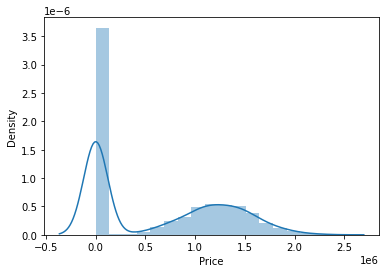

In [24]:
sns.distplot(df["Price"])

In [25]:
df.corr()["Price"].sort_values()

Avg. Area Number of Bedrooms    0.046494
Avg. Area Number of Rooms       0.087080
Area Population                 0.101338
Avg. Area House Age             0.133894
Avg. Area Income                0.178801
Price                           1.000000
Name: Price, dtype: float64

<AxesSubplot:>

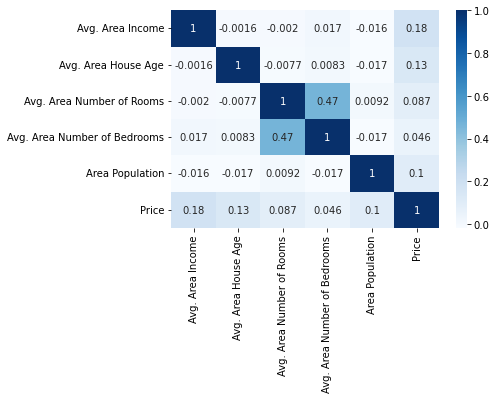

In [26]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

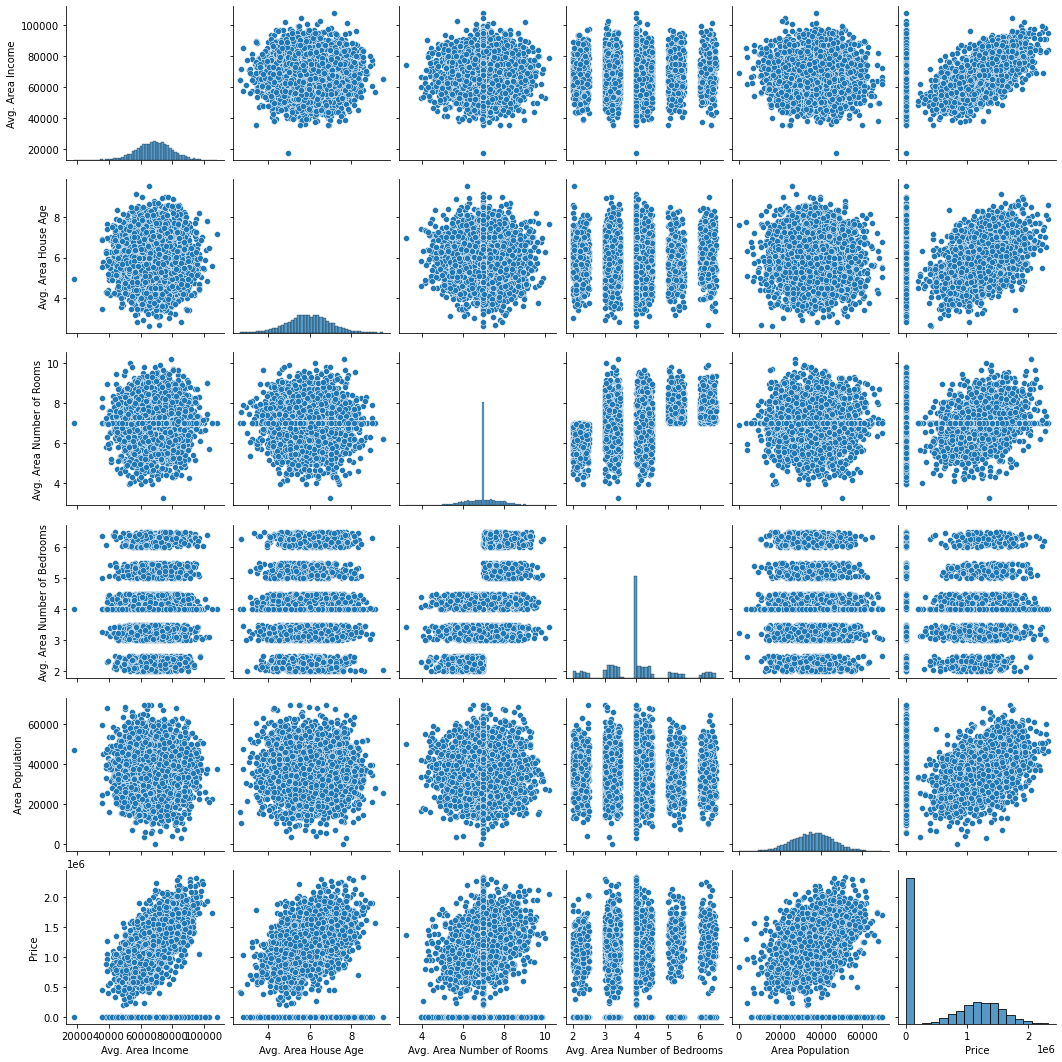

In [27]:
sns.pairplot(data=df)

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["state"]=le.fit_transform(df["state"])

In [29]:
x=df.drop(['Address','Price'],axis=1)
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,state
0,79545.458574,5.976820,6.994414,3.998083,23086.800503,37
1,79248.642455,6.002900,6.730821,3.090000,40173.072174,8
2,61287.067179,5.865890,8.512727,5.130000,36882.159400,59
3,63345.240046,7.188236,6.994414,3.998083,34310.242831,4
4,59982.197226,5.040555,7.839388,4.230000,26354.109472,1


In [30]:
y=df['Price']
y

0       1.059034e+06
1       2.677139e+02
2       1.058988e+06
3       2.241097e+02
4       6.309435e+05
            ...     
4995    1.884789e+02
4996    1.482618e+06
4997    1.832408e+02
4998    1.198657e+06
4999    2.309245e+02
Name: Price, Length: 5000, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25, random_state=1)

In [33]:
lreg=LinearRegression()
lreg.fit(xtrain,ytrain)
ypred=lreg.predict(xtest)
ypred

array([810658.3575105 , 806584.83075333, 495382.68480774, ...,
       623652.2919982 , 408975.11325236, 963562.52020671])

In [34]:
print(f'R2 score-:{r2_score(ytest,ypred)}')
print(f'Mean squared Error-:{mean_squared_error(ytest,ypred)}')
print(f'Root mean squared Error-:{np.sqrt(mean_squared_error(ytest,ypred))}')

R2 score-:0.07250661800589109
Mean squared Error-:416865314428.0289
Root mean squared Error-:645651.0779267923


In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25, random_state=1)

In [37]:
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
ypred

array([1.75918004e+06, 1.65546674e+06, 1.18479927e+06, ...,
       1.47233770e+06, 1.04634712e+06, 3.05578097e+02])

In [38]:
print(f'R2 score-:{r2_score(ytest,ypred)}')
print(f'Mean squared Error-:{mean_squared_error(ytest,ypred)}')
print(f'Root mean squared Error-:{np.sqrt(mean_squared_error(ytest,ypred))}')


R2 score-:-1.0170611559246074
Mean squared Error-:906575560870.5956
Root mean squared Error-:952142.6158252741


In [39]:
for i in range(1,25):
    dt=DecisionTreeRegressor(max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    print(f'R2 score-:{i}:{r2_score(ytest,ypred)}')

R2 score-:1:0.009054071824839638
R2 score-:2:0.02607332066825152
R2 score-:3:0.041347274015352986
R2 score-:4:0.0384717290980755
R2 score-:5:0.022175960296502928
R2 score-:6:0.0032912868916916693
R2 score-:7:-0.04912878577249935
R2 score-:8:-0.10708771311082343
R2 score-:9:-0.19555142962446403
R2 score-:10:-0.25855915646549343
R2 score-:11:-0.33464854852682313
R2 score-:12:-0.3816474122171223
R2 score-:13:-0.4433410489122336
R2 score-:14:-0.557051769335164
R2 score-:15:-0.5909079598195226
R2 score-:16:-0.6860237050787081
R2 score-:17:-0.7036292389808547
R2 score-:18:-0.7861422137484906
R2 score-:19:-0.8477177128560744
R2 score-:20:-0.8918577658996578
R2 score-:21:-0.91517057286962
R2 score-:22:-0.9498562184354975
R2 score-:23:-0.9497562611363806
R2 score-:24:-0.970207422717456


In [40]:
dt=DecisionTreeRegressor(max_depth=23)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(f'R2 score-:{i}:{r2_score(ytest,ypred)}')

R2 score-:24:-0.9333113611992385


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrain = sc.transform(xtrain)
xtest = sc.transform(xtest)

In [42]:
#SVR
from sklearn.svm import SVR
 
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(xtrain, ytrain)
# svr_rbf.score(xtest, ytest)
ypred = svr_rbf.predict(xtest)
print(f"MSE -: {mean_squared_error(ytest, ypred)}")
print(f"RMSE -:{np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R-Squared -:{r2_score(ytest, ypred)}")

MSE -: 471671497205.6612
RMSE -:686783.4427282454
R-Squared -:-0.04943293911067892


In [43]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(xtrain, ytrain)
# svr_linear.score(xtest, ytest)
ypred = svr_linear.predict(xtest)
print(f"MSE -: {mean_squared_error(ytest, ypred)}")
print(f"RMSE -:{np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R-Squared -:{r2_score(ytest, ypred)}")

MSE -: 471500379639.6295
RMSE -:686658.8524439407
R-Squared -:-0.04905221563826645


In [44]:
svr_poly = SVR(kernel='poly',degree=2,)
svr_poly.fit(xtrain, ytrain)
# svr_poly.score(xtest, ytest)
ypred = svr_poly.predict(xtest)
print(f"MSE -: {mean_squared_error(ytest, ypred)}")
print(f"RMSE -:{np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R-Squared -:{r2_score(ytest, ypred)}")

MSE -: 471678184966.2175
RMSE -:686788.3116115311
R-Squared -:-0.04944781886546212


In [45]:
#C & GAMMA
from sklearn.model_selection import GridSearchCV
parameters={"C":[1,10,100],"gamma":[0.1,0.01,0.001],"kernel":["rbf"]}
grid=GridSearchCV(SVR(),parameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END .......................C=1, gamma=0.001,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [46]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [47]:
ypred=grid.predict(xtest)
print(f"R-Squared -:{r2_score(ytest, ypred)}")

R-Squared -:-0.047853261618661325


In [48]:
parameters={"C":[1,10,100,1000,10000],"gamma":[0.1,0.01,0.001],"kernel":["linear"]}
grid=GridSearchCV(SVR(),parameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.3s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.3s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.3s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.3s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.3s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.3s
[CV] END ....................C=1, gamma=0.001, k

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear']},
             verbose=2)

In [49]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}

In [50]:
ypred=grid.predict(xtest)
print(f"R-Squared -:{r2_score(ytest, ypred)}")

R-Squared -:0.030847145910142593


In [51]:
parameters={"C":[1,10,100],"gamma":[0.1,0.01,0.001],"kernel":["poly"]}
grid=GridSearchCV(SVR(),parameters,verbose=2)
grid.fit(xtrain,ytrain)
grid.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.3s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.3s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.3s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.3s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.3s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.3s
[CV] END ......................C=1, gamma=0.001, 

{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}

In [52]:
ypred=grid.predict(xtest)
print(f"R-Squared -:{r2_score(ytest, ypred)}")

R-Squared -:-0.04712142534430441


In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
#CROSS VALIDATION
models=[]

models.append(("svm-rbf -:" , SVR(kernel="rbf")))
models.append(("svm-linear -:" , SVR(kernel="linear")))
models.append(("svm-poly -:" , SVR(kernel="poly")))

In [55]:
for name,model in models:
    cvs=cross_val_score(model,x,y,cv=15,scoring="r2")
    print(name)
    print(cvs)

svm-rbf -:
[-0.82673981 -0.86447021 -0.83508749 -0.84383609 -0.80960475 -0.86651561
 -0.80719103 -0.86221075 -0.83168031 -0.86097743 -0.80701293 -0.86887626
 -0.82518236 -0.86960553 -0.82578075]
svm-linear -:
[-0.01099485  0.02594468  0.03629031  0.05709337 -0.01840518 -0.02588061
  0.01709258  0.01344976 -0.00830919 -0.01255982 -0.05645642 -0.05109114
 -0.06344423 -0.000697   -0.01450502]
svm-poly -:
[-0.82677021 -0.86446972 -0.83509845 -0.843837   -0.80962664 -0.86672637
 -0.80710083 -0.86235907 -0.83158611 -0.86112795 -0.8068574  -0.86909092
 -0.8250187  -0.8697044  -0.82565473]


In [4]:
data={'Model':['LinearRegression','DecisionTreeRegresser','SVM=rbf','SVM=Linear','SVM=ploy'],
     'R2score':[0.072,-1.017,-0.049,-0.04,-0.04],
     'MSE':[416865314428.02,906575560870,471671497205.6,471500379639.6,471678184966.2],
     'RMSE':[645651.07,952142.61,686783.4,686658.8,686788.3]}
df1=pd.DataFrame(data)
df1

,Model,R2score,MSE,RMSE
0,LinearRegression,0.072,4.168653e+11,645651.07
1,DecisionTreeRegresser,-1.017,9.065756e+11,952142.61
2,SVM=rbf,-0.049,4.716715e+11,686783.40
3,SVM=Linear,-0.040,4.715004e+11,686658.80
4,SVM=ploy,-0.040,4.716782e+11,686788.30


In [56]:
for name ,model in models:
    cvs=cross_val_score(model,x,y,cv=15,scoring="r2")
    print(name,cvs.mean())

svm-rbf -: -0.8403180886635603
svm-linear -: -0.007498183957600357
svm-poly -: -0.8403352329080693
